In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import pandas as pd
import pathlib

data_folder = pathlib.Path("processed_data")
fig_folder = pathlib.Path("figs")

fig_folder.mkdir(parents=True, exist_ok=True)

/tmp/ipykernel_9469/3114767131.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


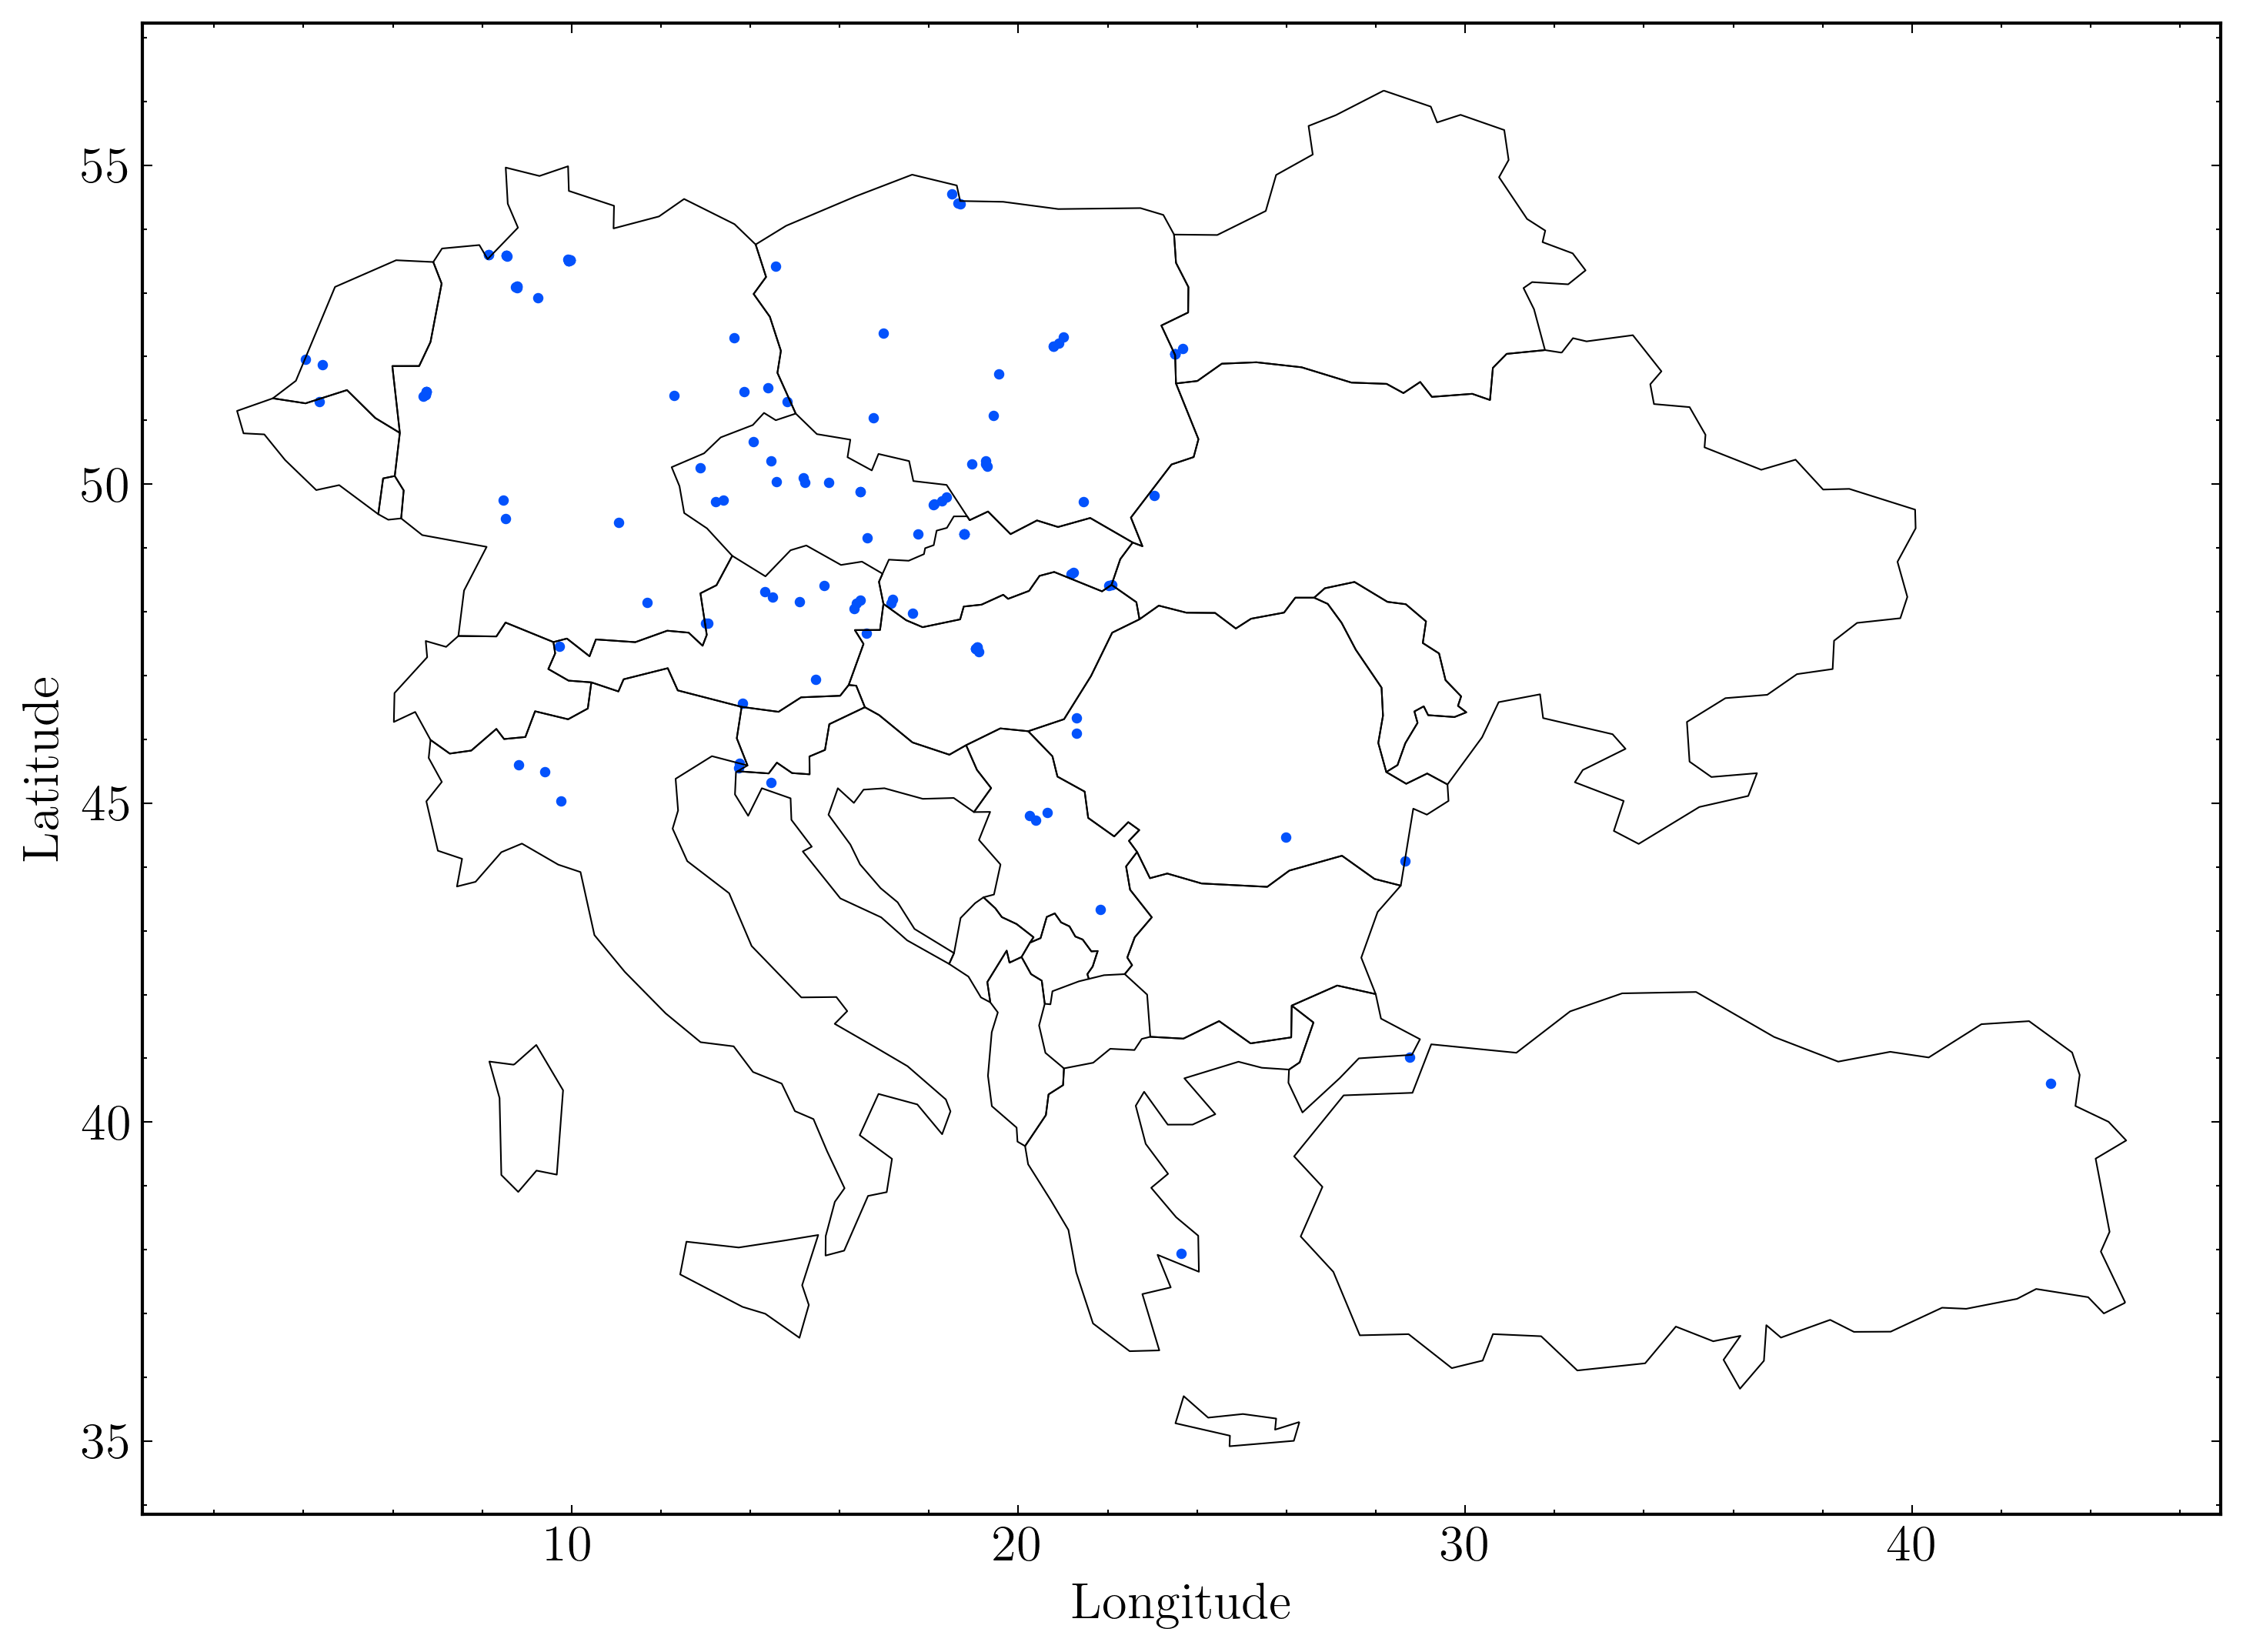

In [4]:
"""Positions of Metrans terminals"""

plt.style.use('fig_style.mplstyle')

with open(data_folder / 'terminals.json') as f:
    terminals = json.load(f)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# List of countries in continental Europe
continental_europe_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
                                'Bulgaria', 'Croatia', 'Czech Republic', 
                                'Germany', 'Greece', 'Hungary', 'Italy', 'Kosovo',  
                                'Liechtenstein', 'Luxembourg', 'Macedonia', 'Moldova', 
                                'Monaco', 'Montenegro', 'Netherlands', 'Poland', 
                                'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 
                                'Switzerland', 'Ukraine', 'Vatican City', 'Turkey']

latitude = [terminal_info["gpx"][0] for terminal_info in terminals["terminals"] if terminal_info["gpx"] != None]
longitude = [terminal_info["gpx"][1] for terminal_info in terminals["terminals"] if terminal_info["gpx"] != None]

# Extract the geometry of continental Europe
continental_europe = world[world['name'].isin(continental_europe_countries)]

# Plot the outline of continental Europe
fig, ax = plt.subplots(figsize=(10, 8))
continental_europe.boundary.plot(ax=ax, linewidth=0.5, color='black')
plt.scatter(longitude, latitude, color='#0352fc', marker='o', s=5.0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig(fig_folder / 'terminal_locations.pdf', dpi=300)
plt.savefig(fig_folder / 'terminal_locations.jpg', dpi=300)
plt.show()